Confusion Matrix:
 [[781   0   0]
 [ 12 140   0]
 [ 22   4  12]]


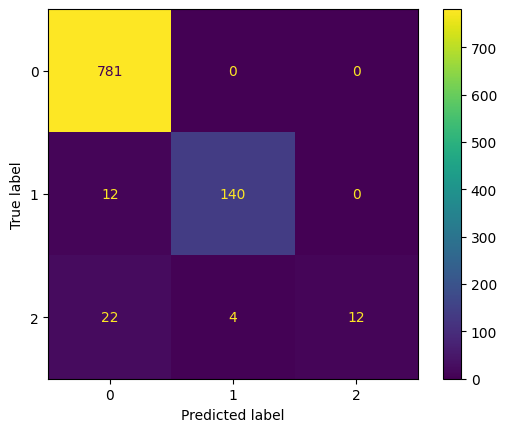

Classification Report:
               precision    recall  f1-score   support

           1       0.96      1.00      0.98       781
           2       0.97      0.92      0.95       152
           3       1.00      0.32      0.48        38

    accuracy                           0.96       971
   macro avg       0.98      0.75      0.80       971
weighted avg       0.96      0.96      0.95       971



In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Cargar el dataset desde un archivo Excel
data_path = "/content/BBDD ONSV SINIESTROS 2021-2022.xlsx"
data = pd.read_excel(data_path)

# Selección de columnas que se conocen antes del siniestro
pre_event_features = [
    'HORA_SINIESTRO', 'TIPO_SINIESTRO', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'ZONA',
    'TIPO_VIA', 'RED_VIAL', 'CICLOVIA', 'CONDICION_CLIMATICATICA', 'ZONIFICACION',
    'CARACTERÍSTICAS_VIA', 'PERFIL_LONGITUDINAL_VÍA', 'SUPERFICIE_CALZADA'
]
pre_event_data = data[pre_event_features]

# Codificación de variables categóricas
le = LabelEncoder()
for column in pre_event_data.columns:
    pre_event_data[column] = le.fit_transform(pre_event_data[column].astype(str))

# Creación de una variable objetivo ficticia (esto debe ser adaptado a un criterio real)
# Ejemplo simple: Clasificación basada en el tipo de siniestro
pre_event_data['severity'] = (pre_event_data['TIPO_SINIESTRO'] % 3) + 1

# Preparación de los datos para el modelo
X = pre_event_data.drop('severity', axis=1)
y = pre_event_data['severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creación y entrenamiento del modelo de Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Predicción y evaluación del modelo
y_pred = rf_classifier.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
classif_report = classification_report(y_test, y_pred)

# Imprimir los resultados de la evaluación
print("Confusion Matrix:\n", conf_matrix)


#matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm_rf)
disp.plot()
plt.show()

print("Classification Report:\n", classif_report)


In [19]:
from sklearn.ensemble import GradientBoostingClassifier

# Configuración y entrenamiento del modelo Gradient Boosting
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train_scaled, y_train)

# Predicción y evaluación del modelo
y_pred = gb_classifier.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
classif_report = classification_report(y_test, y_pred)

# Imprimir los resultados de la evaluación
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classif_report)



Confusion Matrix:
 [[781   0   0]
 [  0 152   0]
 [  0   0  38]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       781
           2       1.00      1.00      1.00       152
           3       1.00      1.00      1.00        38

    accuracy                           1.00       971
   macro avg       1.00      1.00      1.00       971
weighted avg       1.00      1.00      1.00       971



In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

# Carga del dataset
data_path = "/content/BBDD ONSV SINIESTROS 2021-2022.xlsx"  # Asegúrate de que la ruta sea correcta
data = pd.read_excel(data_path)

# Selección de características que se conocen antes del siniestro
features = [
    'HORA_SINIESTRO', 'TIPO_SINIESTRO', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'ZONA',
    'TIPO_VIA', 'RED_VIAL', 'CICLOVIA', 'CONDICION_CLIMATICATICA', 'ZONIFICACION',
    'CARACTERÍSTICAS_VIA', 'PERFIL_LONGITUDINAL_VÍA', 'SUPERFICIE_CALZADA'
]
data = data[features]

# Codificación de variables categóricas
le = LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column].astype(str))

# Creación de una variable objetivo ficticia (esto debería ser ajustado según los datos reales)
data['severity'] = (data['TIPO_SINIESTRO'] % 3) + 1

# Preparación de los datos para el modelo
X = data.drop('severity', axis=1)
y = data['severity']

# Escalamiento de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Creación del modelo de Gradient Boosting
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Aplicación de la validación cruzada
cv_scores = cross_val_score(gb_classifier, X_scaled, y, cv=5)  # 5-fold cross-validation

# Imprimir los resultados de la validación cruzada
print("Accuracy scores for each fold:")
print(cv_scores)
print("Mean cross-validation score: {:.2f}".format(cv_scores.mean()))


Accuracy scores for each fold:
[0.99897013 0.99897013 1.         1.         0.99897013]
Mean cross-validation score: 1.00
